## Analysing Fuel Voltage Signal Data

In [1]:
import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter, freqz
from scipy import signal as sg
import matplotlib.pyplot as plt
from scipy.fftpack import fft
import statsmodels.api as sm
import datetime

%matplotlib inline

C:\Users\manje_000\AppData\Local\Programs\Python\Python36\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools



### Data Gathering (From First Step Wrangling in F1)
#### Loading data in Pandas Dataframe

In [49]:
df1 = pd.read_csv(r"data\data1.csv")
df2 = pd.read_csv(r"data\data2.csv")
df3 = pd.read_csv(r"data\data3.csv")
df4 = pd.read_csv(r"data\data4.csv")
df5 = pd.read_csv(r"data\data5.csv")
df6 = pd.read_csv(r"data\data6.csv")

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67848 entries, 0 to 67847
Data columns (total 5 columns):
Unnamed: 0     67848 non-null int64
datetime       67848 non-null object
speed          67848 non-null float64
distance       67848 non-null int64
fuelVoltage    67848 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.6+ MB


In [ ]:
### Sorting w.r.t to time

### Assessing 
#### 1. Checking order of Data, as per datetime

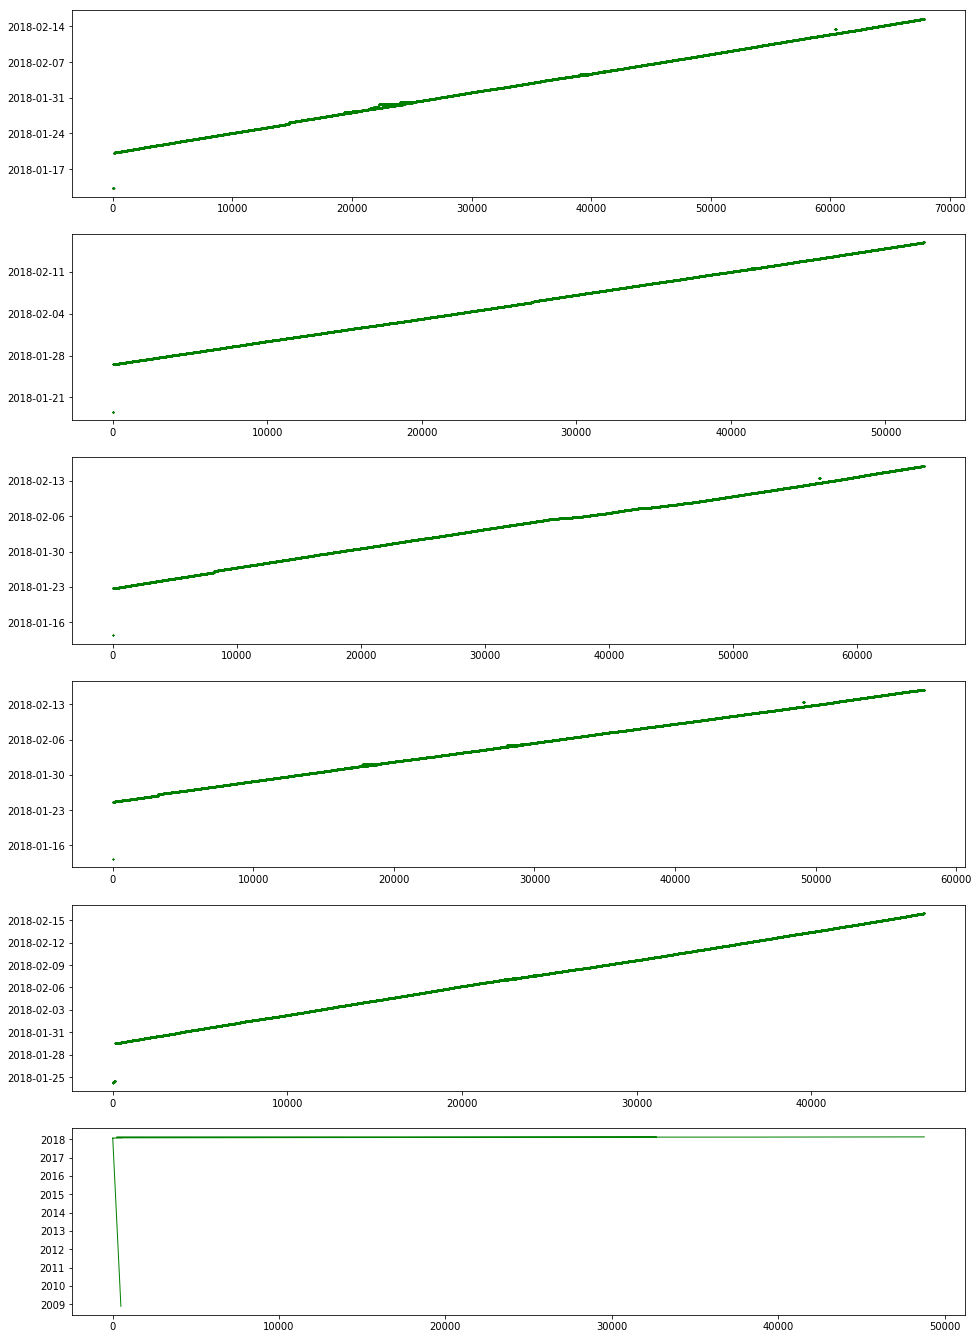

In [53]:
plt.rcParams['figure.figsize'] = [16,24]
plt.subplot(6,1,1)
plt.plot(df1.index, df1.datetime, 'g.', markersize = 1, linewidth = 1);

plt.subplot(6,1,2)
plt.plot(df2.index, df2.datetime, 'g.', markersize = 1, linewidth = 1);

plt.subplot(6,1,3)
plt.plot(df3.index, df3.datetime, 'g.', markersize = 1, linewidth = 1);

plt.subplot(6,1,4)
plt.plot(df4.index, df4.datetime, 'g.', markersize = 1, linewidth = 1);

plt.subplot(6,1,5)
plt.plot(df5.index, df5.datetime, 'g.', markersize = 1, linewidth = 1);

plt.subplot(6,1,6)
plt.plot(df6.index, df6.datetime, 'g-', markersize = 1, linewidth = 1);


### Assessing 
#### 2. Plotting Fuel voltage vs Datetime

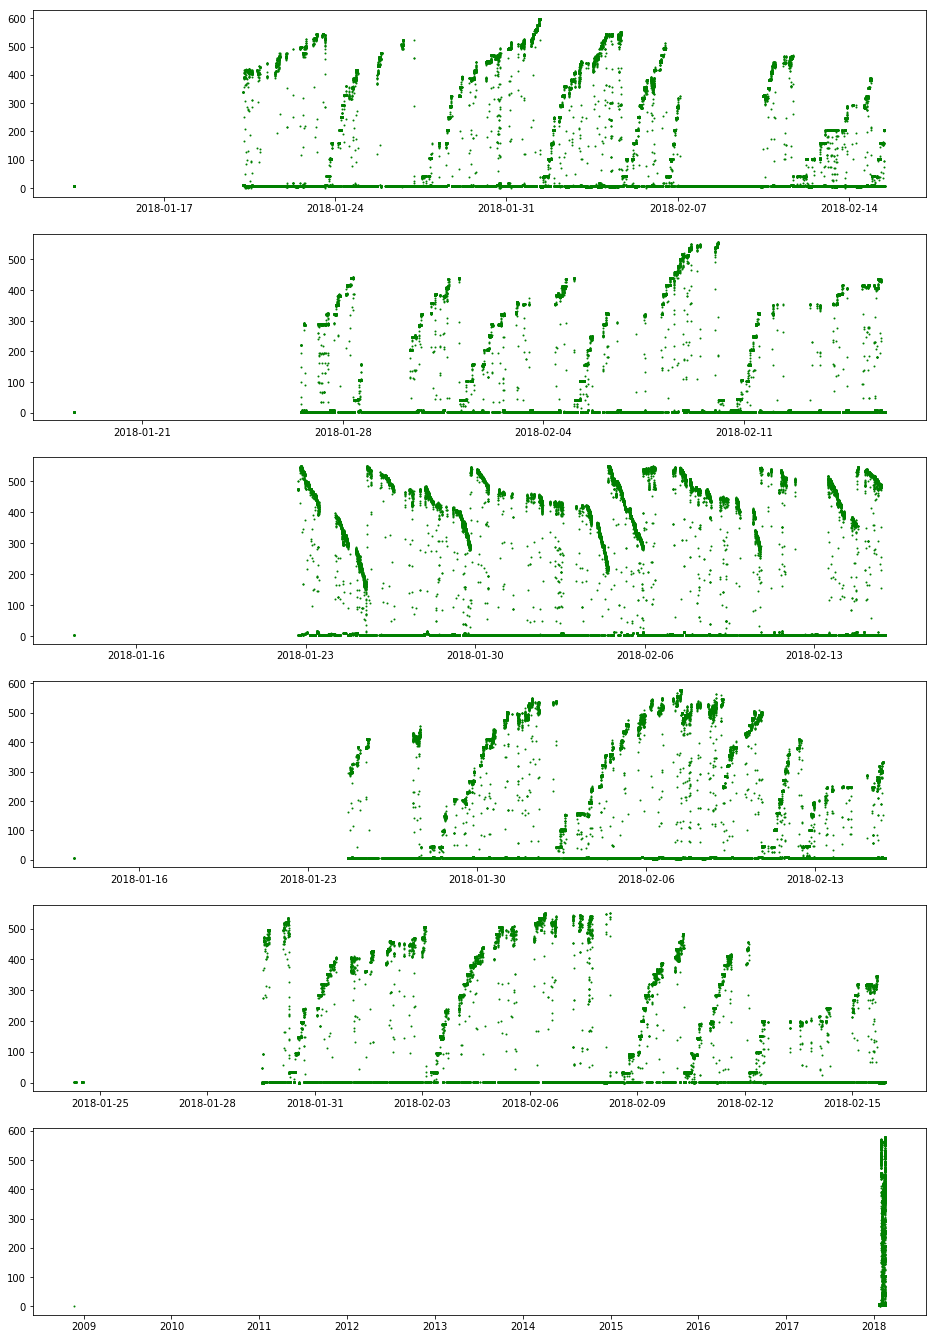

In [58]:
plt.rcParams['figure.figsize'] = [16,24]
plt.subplot(6,1,1)
plt.plot(df1.datetime, df1.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

plt.subplot(6,1,2)
plt.plot( df2.datetime, df2.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

plt.subplot(6,1,3)
plt.plot(df3.datetime, df3.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

plt.subplot(6,1,4)
plt.plot(df4.datetime, df4.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

plt.subplot(6,1,5)
plt.plot(df5.datetime, df5.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

plt.subplot(6,1,6)
plt.plot(df6.datetime, df6.fuelVoltage, 'g.', markersize = 2, linewidth = 1);
#plt.xlim(datetime.datetime(2018,1,27,2,0), datetime.datetime(2018,2,15,6,55));


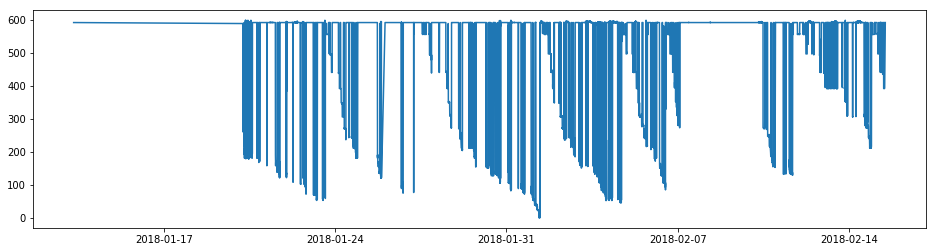

In [55]:
df = df1.copy()
df.fuelVoltage = df.fuelVoltage.max() - df.fuelVoltage

plt.rcParams['figure.figsize'] = (16,4)
plt.plot(df.datetime, df.fuelVoltage);

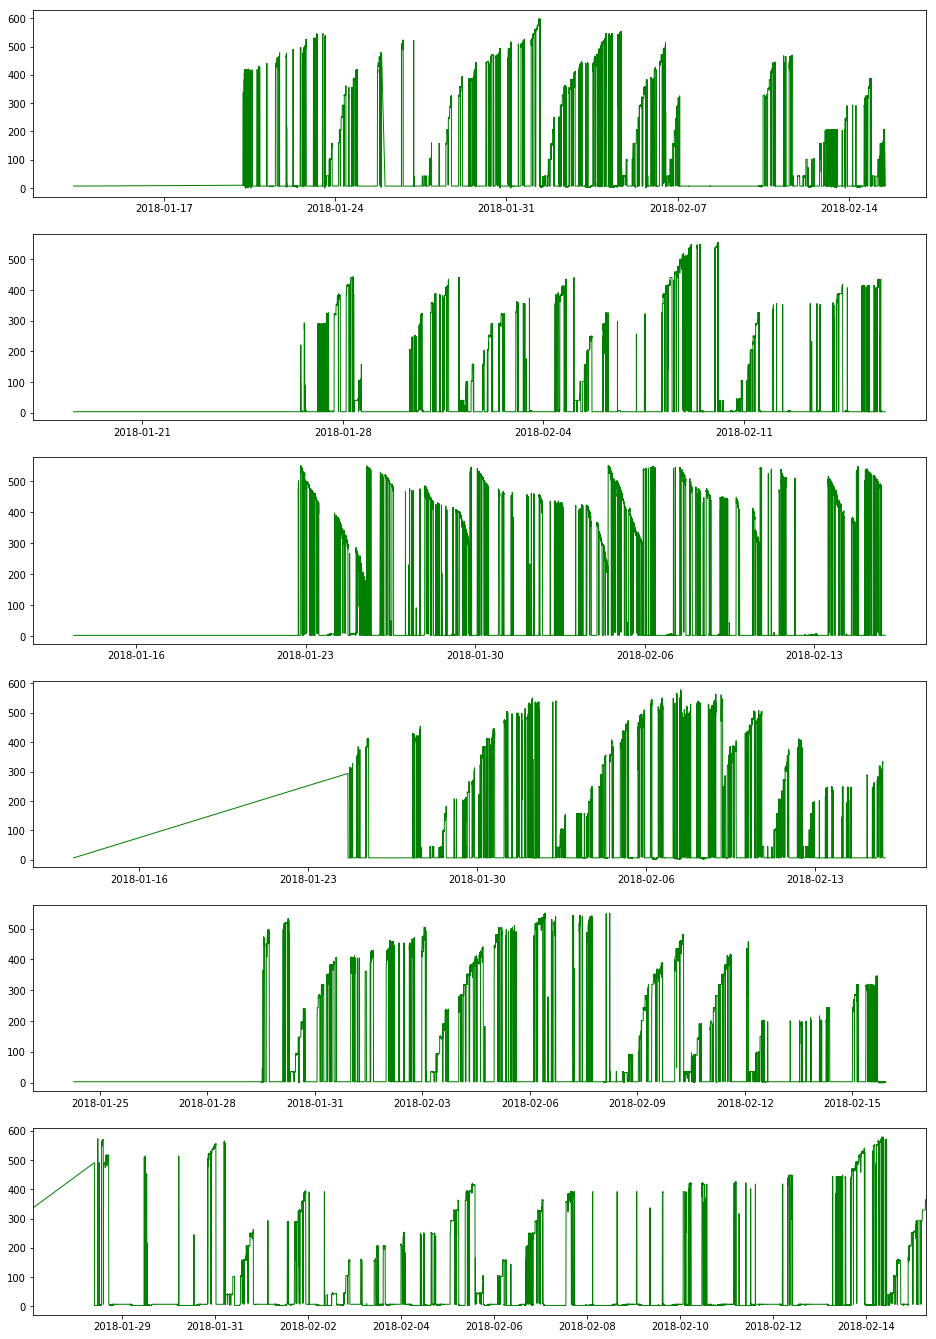

In [56]:
plt.rcParams['figure.figsize'] = [16,24]
plt.subplot(6,1,1)
plt.plot(df1.datetime, df1.fuelVoltage, 'g-', markersize = 2, linewidth = 1);

plt.subplot(6,1,2)
plt.plot( df2.datetime, df2.fuelVoltage, 'g-', markersize = 2, linewidth = 1);

plt.subplot(6,1,3)
plt.plot(df3.datetime, df3.fuelVoltage, 'g-', markersize = 2, linewidth = 1);

plt.subplot(6,1,4)
plt.plot(df4.datetime, df4.fuelVoltage, 'g-', markersize = 2, linewidth = 1);

plt.subplot(6,1,5)
plt.plot(df5.datetime, df5.fuelVoltage, 'g-', markersize = 2, linewidth = 1);

plt.subplot(6,1,6)
plt.plot(df6.datetime, df6.fuelVoltage, 'g-', markersize = 2, linewidth = 1);
plt.xlim(datetime.datetime(2018,1,27,2,0), datetime.datetime(2018,2,15,6,55));


### Assessing 
#### 3. Plotting Cumulative Distance vs time

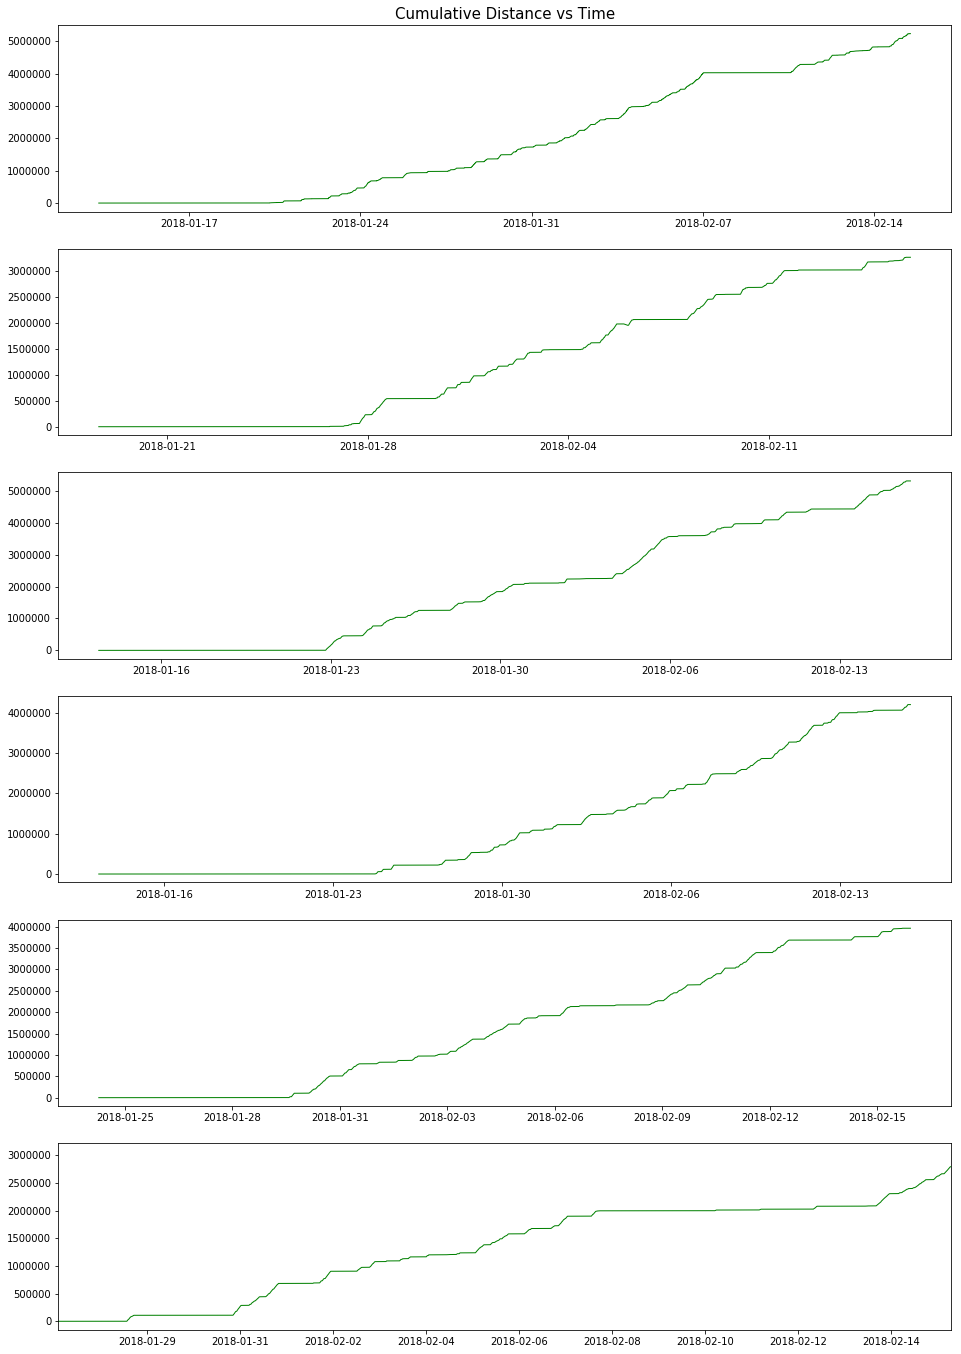

In [60]:
plt.rcParams['figure.figsize'] = [16,24]
plt.subplot(6,1,1)
plt.plot(df1.datetime, df1.distance, 'g-', markersize = 2, linewidth = 1);
plt.title("Cumulative Distance vs Time", fontsize = 15)

plt.subplot(6,1,2)
plt.plot( df2.datetime, df2.distance, 'g-', markersize = 2, linewidth = 1);

plt.subplot(6,1,3)
plt.plot(df3.datetime, df3.distance, 'g-', markersize = 2, linewidth = 1);

plt.subplot(6,1,4)
plt.plot(df4.datetime, df4.distance, 'g-', markersize = 2, linewidth = 1);

plt.subplot(6,1,5)
plt.plot(df5.datetime, df5.distance, 'g-', markersize = 2, linewidth = 1);

plt.subplot(6,1,6)
plt.plot(df6.datetime, df6.distance, 'g-', markersize = 2, linewidth = 1);
plt.xlim(datetime.datetime(2018,1,27,2,0), datetime.datetime(2018,2,15,6,55));


### Data Cleaning

#### 1. Setting Datetime datatype for all datasets, depending upon type of date format written

In [61]:
## Convert Datetime row to Datetime Object
# df1.datetime = pd.to_datetime(df1.datetime)
# df2.datetime = pd.to_datetime(df2.datetime)
# df3.datetime = pd.to_datetime(df3.datetime)
# df4.datetime = pd.to_datetime(df4.datetime)
# df5.datetime = pd.to_datetime(df5.datetime)
# df6.datetime = pd.to_datetime(df6.datetime)


#### Above method FAILS as it misinterprets somtimes day and month 

df1.datetime = df1.datetime.apply(lambda x: datetime.datetime.strptime(str(x), "%d-%m-%y %H:%M") )
df2.datetime = df2.datetime.apply(lambda x: datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S") )
df3.datetime = df3.datetime.apply(lambda x: datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S") )
df4.datetime = df4.datetime.apply(lambda x: datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S") )
df5.datetime = df5.datetime.apply(lambda x: datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S") )
df6.datetime = df6.datetime.apply(lambda x: datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S") )


ValueError: time data '2018-01-13 07:10:00' does not match format '%d-%m-%y %H:%M'

#### 2. Sorting data as per DATETIME

In [51]:
df1 = df1.sort_values(['datetime'], ascending= True)
df2 = df2.sort_values(['datetime'], ascending= True)
df3 = df3.sort_values(['datetime'], ascending= True)
df4 = df4.sort_values(['datetime'], ascending= True)
df5 = df5.sort_values(['datetime'], ascending= True)
df6 = df6.sort_values(['datetime'], ascending= True)

#### 3. Removing Outliars

In [68]:
date = datetime.datetime(2018,1,18)
df1 = df1[df1['datetime'] >= date]

In [67]:
datetime.datetime(2016,5,1).month

5

## Analysing Changes

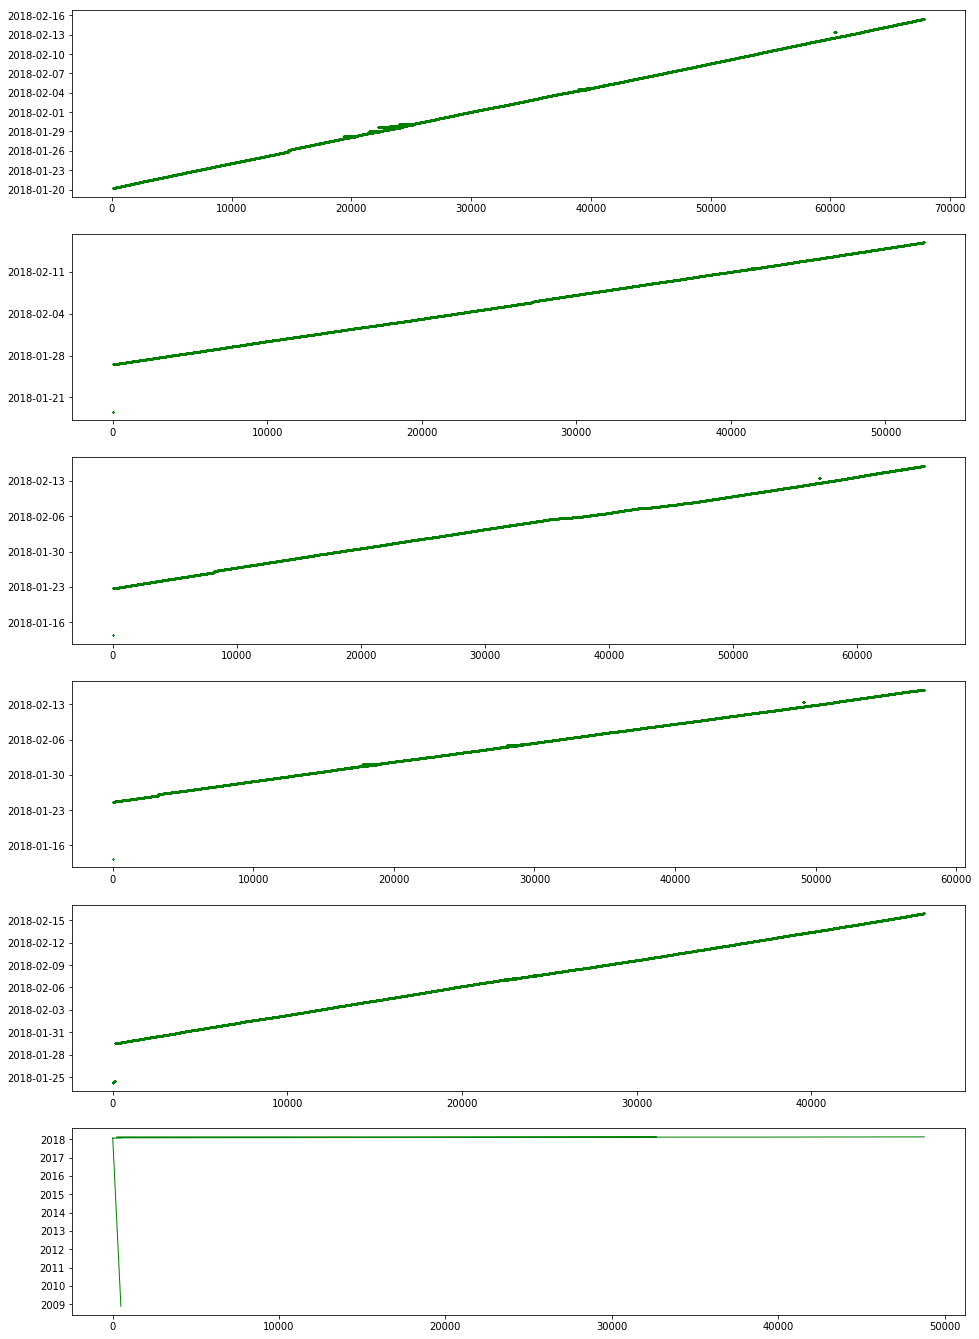

In [69]:
plt.rcParams['figure.figsize'] = [16,24]
plt.subplot(6,1,1)
plt.plot(df1.index, df1.datetime, 'g.', markersize = 1, linewidth = 1);

plt.subplot(6,1,2)
plt.plot(df2.index, df2.datetime, 'g.', markersize = 1, linewidth = 1);

plt.subplot(6,1,3)
plt.plot(df3.index, df3.datetime, 'g.', markersize = 1, linewidth = 1);

plt.subplot(6,1,4)
plt.plot(df4.index, df4.datetime, 'g.', markersize = 1, linewidth = 1);

plt.subplot(6,1,5)
plt.plot(df5.index, df5.datetime, 'g.', markersize = 1, linewidth = 1);

plt.subplot(6,1,6)
plt.plot(df6.index, df6.datetime, 'g-', markersize = 1, linewidth = 1);


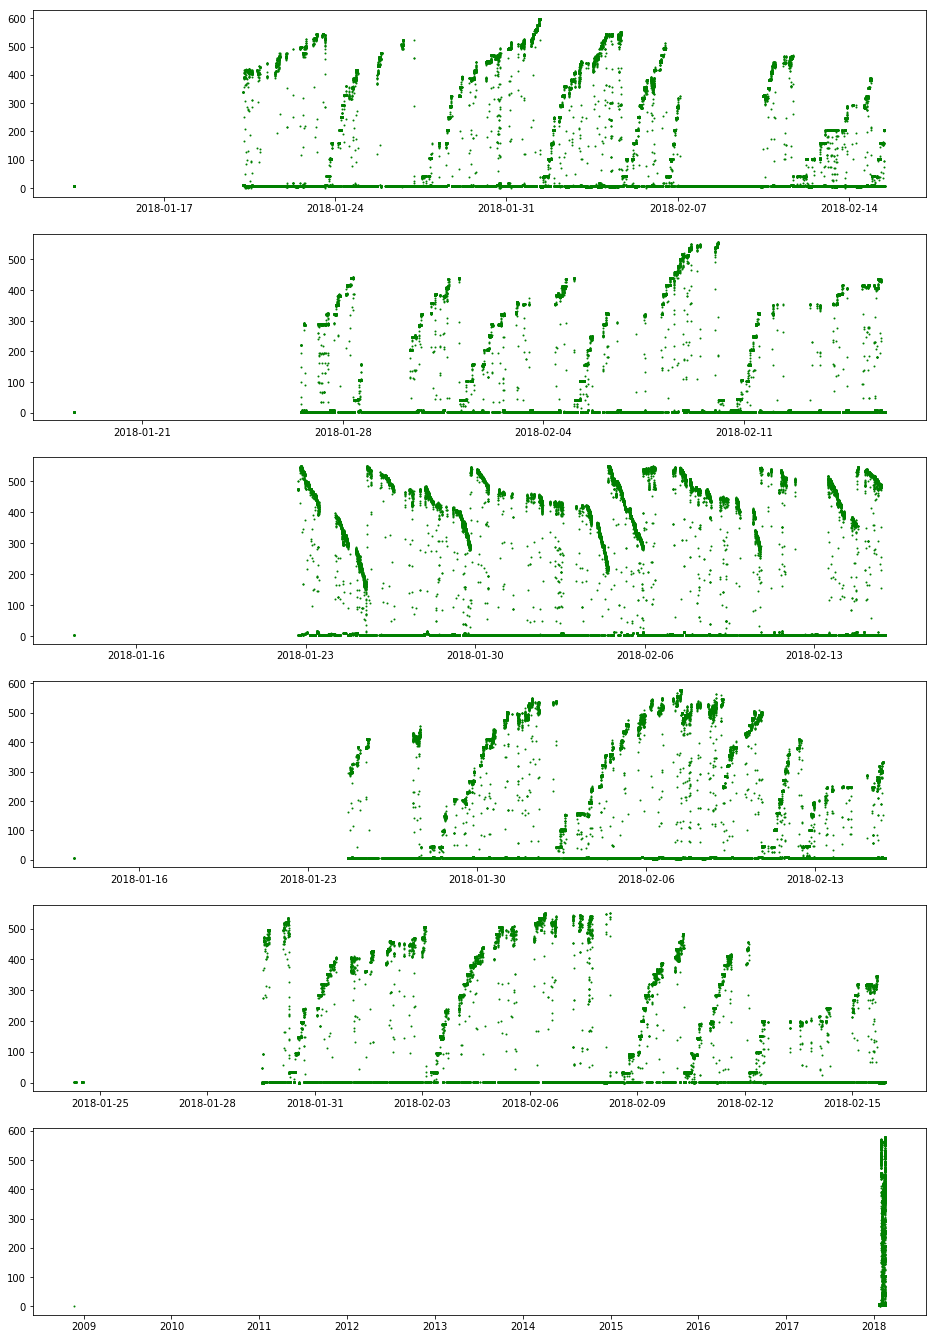

In [64]:
plt.rcParams['figure.figsize'] = [16,24]
plt.subplot(6,1,1)
plt.plot(df1.datetime, df1.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

plt.subplot(6,1,2)
plt.plot( df2.datetime, df2.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

plt.subplot(6,1,3)
plt.plot(df3.datetime, df3.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

plt.subplot(6,1,4)
plt.plot(df4.datetime, df4.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

plt.subplot(6,1,5)
plt.plot(df5.datetime, df5.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

plt.subplot(6,1,6)
plt.plot(df6.datetime, df6.fuelVoltage, 'g.', markersize = 2, linewidth = 1);
#plt.xlim(datetime.datetime(2018,1,27,2,0), datetime.datetime(2018,2,15,6,55));


### Sample Assessement on Data 1
#### 1. Soritng as per date
#### 2. Performing Spectral analysis


In [ ]:
df2.datetime = pd.to_datetime(df.datetime)

In [ ]:
df.describe()

In [ ]:
df.head(10)

In [ ]:
plt.rcParams['figure.figsize'] = [16,4]
plt.scatter(df.index, df.fuelVoltage);
plt.title("FuelVoltage vs Index (Sorted)", fontsize= 15)


The above line plot donot give a clear picture, about where the maximum datapoints are located. The give a better picture, we will use Box plot  and scatter plot, that will help us in analysing where most of the data points are situated.

In [ ]:
plt.rcParams['figure.figsize'] = [4,8];
plt.boxplot(df.fuelVoltage);
plt.title('Fuel Level - Box Plot');

Above is the box plot of fuel data

In [ ]:
plt.rcParams['figure.figsize'] = [16,4]
plt.plot(df.datetime, df.fuelVoltage,'b.' )
plt.xlim(datetime.datetime(2018,1,27,2,0), datetime.datetime(2018,2,15,6,55))
plt.title("FuelVoltage vs Time (Sorted)", fontsize= 15)


In [ ]:
plt.plot(df.datetime, df.fuelVoltage,'b-' )
plt.xlim(datetime.datetime(2018,1,27,2,0), datetime.datetime(2018,2,17,6,55))

In [ ]:
datetime.datetime(2018,1,22)



### Paasing through Low Pass Butterworth filter. 
We can remove incorrect data by treating them as nose, and passing the time-bound signal through a low pass filter. But before that, it is important to analysis the Spectral plot of the voltage signal, in order to know the range and magnitude of noise frequency.


### Spectral Analysis - Plotting FFT


FFT will help in understanding the different frequency components available in the voltage signal in the form of noise.

In [ ]:
norm_data = df.fuelVoltage/df.fuelVoltage.max()
yvolt = fft(norm_data)
plt.ylim(0,3000);
plt.plot(np.abs(yvolt[:1000]));
plt.rcParams['figure.figsize'] = [16,4]
plt.xscale('log')
plt.ylabel('Amplitude Response (dB)')
plt.xlabel('Frequency (Hz, Log Scale)')
plt.axvline(2.5, color = 'black')
plt.text(2.1,-50, "Cut-off", fontsize = 15);

Hence most dominant frequency magnitudes are between 1-3 Hz signal, i.e. almost a DC signal. Remaining all are noise in the system. All these noise can be removed using a  low-pass butterworth filter. Hence our cut-off frequency will be 2.5Hz

### SIgnal Filteration


This block defines the lowpass butterworth filter to be used for extracting true signal

In [ ]:
def butter_lowpass_filter(data, cutoff, fs, order=5, ftype = False):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=ftype)
    y = lfilter(b, a, data)
    y1 = sg.filtfilt(b,a, data)
    return y,y1



In [ ]:
df.fuelVoltage.describe()

### Results

In [ ]:
# Filter the data, and plot both the original and filtered signals.
fs = 4000             # Sampling Frequency
order = 5             # Order of Filter
cutoff = 50          # Filter Cut-off Frequency

# Calling Butterworth filter
y,y1 = butter_lowpass_filter(norm_data, cutoff, fs, order, ftype= False)

time = df.datetime

#Plotting Results
plt.rcParams['figure.figsize'] = [16,16]

plt.subplot(4, 1,1)
#plt.plot(time, norm_data, 'b-', linewidth=1, label='Original Signal')
plt.plot(df.index, df.datetime, 'g.', markersize = 1, linewidth = 1)
plt.legend()
plt.grid()
plt.ylabel('Fuel Voltage (Normalised)',  fontsize = 14)
plt.title('Original Fuel Voltage', fontsize = 20)
plt.ylim(datetime.datetime(2018,1,27,2,0), datetime.datetime(2018,2,15,6,55))
#plt.axvline(60000, color = 'black')

plt.subplot(4, 1,2)
plt.plot(time, y, 'r-', linewidth=1, label='Original Signal')
plt.legend()
plt.twinx()
plt.ylabel('Cumulative Distance (Normalised)',  fontsize = 14)
plt.xlim(datetime.datetime(2018,1,27,2,0), datetime.datetime(2018,2,15,6,55))

plt.subplot(4, 1,3)
plt.plot(df.datetime, df['distance']/df['distance'].max(), label='Cumulative Distance - DateSorted');
plt.legend()
plt.twinx()
plt.ylabel('Cumulative Distance (Normalised)',  fontsize = 14)
plt.xlim(datetime.datetime(2018,1,27,2,0), datetime.datetime(2018,2,15,6,55))

df3 = df2.sort_values(by=['distance'], ascending=True);
plt.subplot(4, 1,4)
plt.plot(df3.index, df3['distance']/df3['distance'].max(), label='Cumulative Distance - Dist Sorted');
plt.legend()
plt.twinx()
plt.ylabel('Cumulative Distance (Normalised)',  fontsize = 14)
plt.xlim(datetime.datetime(2018,1,27,2,0), datetime.datetime(2018,2,15,6,55))

#plt.xlim(pd.)

# plt.subplot(4, 1,1)
# plt.plot(df.datetime, y1, 'r-', linewidth=3, label='Fuel Voltage, filtered')
# plt.ylim(0,1)
plt.grid()
plt.legend()
plt.ylabel('Fuel Voltage (Normalised)',  fontsize = 14)
plt.title('Filtered Voltage', fontsize = 20)
plt.xlabel('Time [sec]',  fontsize = 14)


plt.tight_layout()


#### **%%%%%%%%%%%%%%%***Relevant Portion Till Now**%%%%%%%%%%%%%**

### Cleaning Data 1

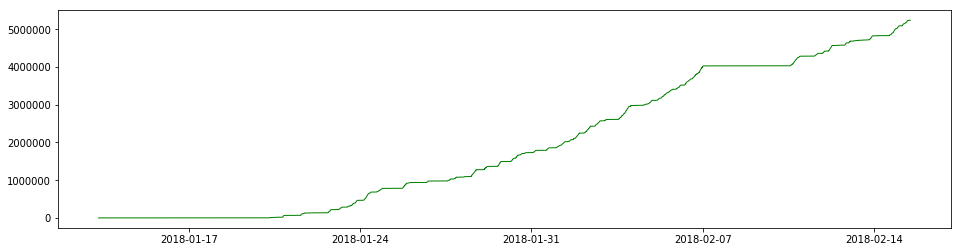

In [46]:
plt.rcParams['figure.figsize'] = [16,4]
plt.plot(df.datetime, df.distance, 'g-', markersize = 2, linewidth = 1);

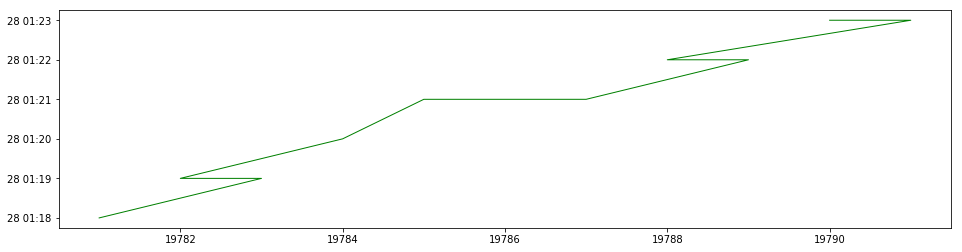

In [45]:
plt.plot(df.index[19700:19710], df.datetime[19700:19710], 'g-', linewidth = 1);

In [44]:
df = df1.sort_values(['datetime'], ascending= True)

In [ ]:
df = df2.copy()
df.datetime = df.datetime.apply(lambda x: datetime.datetime.strptime(str(x), "%Y-%d-%m %H:%M") )

In [5]:
df1.datetime[29875:29884]

29875    31-01-18 23:58
29876    31-01-18 23:59
29877    31-01-18 23:59
29878     01-02-18 0:00
29879     01-02-18 0:00
29880     01-02-18 0:01
29881     01-02-18 0:01
29882     01-02-18 0:02
29883     01-02-18 0:02
Name: datetime, dtype: object

In [6]:
df2.datetime[29875:29884]

29875    2018-02-07 02:07:05
29876    2018-02-07 02:07:35
29877    2018-02-07 02:08:05
29878    2018-02-07 02:08:36
29879    2018-02-07 02:09:05
29880    2018-02-07 02:09:35
29881    2018-02-07 02:11:07
29882    2018-02-07 02:11:36
29883    2018-02-07 02:12:06
Name: datetime, dtype: object

In [15]:
df5.datetime[29875:29884]

29875    2018-02-09 14:16:56
29876    2018-02-09 14:17:26
29877    2018-02-09 14:17:56
29878    2018-02-09 14:18:26
29879    2018-02-09 14:18:56
29880    2018-02-09 14:19:26
29881    2018-02-09 14:19:56
29882    2018-02-09 14:20:26
29883    2018-02-09 14:20:57
Name: datetime, dtype: object

In [ ]:
str(df2.datetime[29875:29884])

In [ ]:
df.datetime[35404:35410]

In [13]:
a = df2.datetime[35404]
datetime.datetime.strptime(str(a), "%Y-%m-%d %H:%M:%S").month

2

#### Replacing wrong data with corrected value
The equivalent predicted values generated out of the low pass filter, can be used to replace the erreneous/noisy data by the better approximate from the filter data.


In [ ]:
# Function to replace noise data using filtered approximate
df2 = df.copy()
def f(x):
    if x[4] > x[3] :
        return x[4]
    else:
        return x[3]

# Normalising fuel voltage data    
df2['Fuel Level (mV)'] = df2['Fuel Level (mV)']/df2['Fuel Level (mV)'].max()

df2['filter_dt'] = y1 
df2['correction'] = df2.apply(f, axis= 1)
df2.head()

In [ ]:
# Coverting timestamp to seconds, starting from time = 0
df2['time_in_sec'] = df2.Timestamp.apply(lambda x : (x - df.Timestamp[0]).total_seconds())
df2.head()

In [ ]:
plt.rcParams['figure.figsize'] = [16,4]
plt.ylim(0,1)

plt.subplot(1,1,1)
plt.scatter(df2.time_in_sec, df2['correction'])
plt.subplot(1,1,1)
plt.plot(df2.time_in_sec, y1, 'red', linewidth = 2)
plt.title('Voltage Data minus Noise', fontsize = 20)


### 2nd level filtering
Still the data, donot looks better approximate. Hence, after replacing with the approximate data, the corrected data can be again passed through low pass filter to obtain better approximate of fuel voltage data

In [ ]:
y,y2 = butter_lowpass_filter(df2['correction'], cutoff, fs, order, ftype= False)

In [ ]:
plt.subplot(1,1,1)
plt.ylim(0,1)
plt.scatter(df2.time_in_sec, df2['correction'], s= 3)
plt.subplot(1,1,1)
plt.plot(df2.time_in_sec, y1, 'red', linewidth = 2)
plt.subplot(1,1,1)
plt.plot(df2.time_in_sec, y2, 'black', linewidth = 2)
plt.title('Voltage Data minus Noise', fontsize = 20)

In [ ]:
plt.ylim(0,1)
plt.plot(df2.Timestamp, y2, 'black', linewidth = 2);
plt.title('Final Approximation after 2-Stage Filteration', fontsize = 20);

In [ ]:
df2['filter_dt_L2'] = y2
df2.head()

### Method 2 : Regression
This is implemted, but dividing the data into small windows of a finite size = sz. And then passing the data of that window to function, he perform linear or 2nd order regression to give approximate curve.

In [ ]:
pd.set_option('display.width', 1000)

#######################################
### Defining Regression Function
#####################################
def regression_data(output_var , input_var):
    lm = sm.OLS(output_var, input_var)
    result = lm.fit()
    return result.params

# Linear Prediction
#########################
i = 0
sz =500   # Window Size
pred_dt = []
while (i<= len(df2)):
    dft = df2[i:i+sz].copy()
    dft['intercept'] = 1
    data = regression_data(dft['Fuel Level (mV)'], dft[['intercept','time_in_sec']])
    prediction = dft['time_in_sec']*data[1] + data[0]
    pred_dt.extend(prediction)
    i = i+sz
df2['Regress_1st'] = pred_dt

In [ ]:
# 2nd order Prediction
################################
i = 0
#sz = 500  # Window Size
pred_dt = []
while (i<= len(df2)):
    dft = df2[i:i+sz].copy()
    dft['intercept'] = 1
    dft['time_sq'] = dft['time_in_sec'].apply(lambda x: x*x)
    
    data = regression_data(dft['Fuel Level (mV)'], dft[['intercept','time_in_sec','time_sq']])
    prediction = (dft['time_sq']*data[2] + dft['time_in_sec']*data[1] + 1*data[0])
    pred_dt.extend(prediction)
    i = i+sz
    
df2['Regress_2nd'] = pred_dt


In [ ]:
plt.subplot(1,1,1)
plt.plot(df2.time_in_sec, df2.Regress_1st, 'yellow', linewidth = 3, label = 'Regression 1st Order')
plt.legend()

plt.subplot(1,1,1)
plt.plot(df2.time_in_sec, df2.Regress_2nd, '-r', label = 'Regression 2nd Order')
plt.legend()

plt.subplot(1,1,1)
plt.scatter(df2.time_in_sec, df2['Fuel Level (mV)'], label = 'Original Fuel Voltage')
plt.legend()

plt.ylabel('Normalised Voltage', fontsize = 14)
plt.xlabel('Time (in sec)', fontsize = 14)
plt.title('Regression 1st order VS 2nd Order', fontsize = 20);


In [ ]:
df2.head()

### Final Conclusion
Finally we can compare the approximare curve obtained from both the methods

In [ ]:
plt.rcParams['figure.figsize'] = [16,6]
plt.subplot(1,1,1)
plt.plot(df2.time_in_sec, df2.predict_2nd, '-r', label = 'Regression Data')
plt.legend()

plt.subplot(1,1,1)
plt.scatter(df2.time_in_sec, df2['correction'], s = 5, label = 'Original Voltage minus Noise')
plt.legend()

plt.subplot(1,1,1)
plt.plot(df2.time_in_sec, df2.filter_dt_L2, 'black', linewidth = 2, label = 'Filtered Voltage Data')
plt.legend()

plt.ylim(0,1)
plt.ylabel('Normalised Voltage', fontsize = 14)
plt.xlabel('Time (in sec)', fontsize = 14)
plt.title('Filter Data VS Regression Data', fontsize = 20);


##### Hence the filtered Data give the better representation of Fuel Voltage Data.

In [ ]:
plt.ylim(0,1)
plt.rcParams['figure.figsize'] = [16,6]
plt.ylabel('Normalised Fuel Voltage (mV)', fontsize = 14)
plt.xlabel('Time', fontsize = 14)
plt.plot(df2.Timestamp, y2, 'black', linewidth = 2);
plt.title('Final Approximation', fontsize = 20);